We did not use any AI-generated code, we changed the code from Assignment 5. We wrote approximately 180 out of 280 lines of code in this project.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import librosa
import librosa.display
import time
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/ML Final Project")      #change working directory
print(os.listdir(os.getcwd()))                           #print what's in directory
test_path1 = os.path.join(os.getcwd(),'IRMAS-TestingData-Part1/IRMAS-TestingData-Part1/Part1')   #set path for testing data
test_path2 = os.path.join(os.getcwd(),'IRMAS-TestingData-Part2/IRMAS-TestingData-Part2/Part2')   #set path for testing data
test_path3 = os.path.join(os.getcwd(),'IRMAS-TestingData-Part3/IRMAS-TestingData-Part3/Part3')   #set path for testing data
training_path = os.path.join(os.getcwd(), 'IRMAS-TrainingData')      #set path for training data
print(training_path)

['IRMAS-TestingData-Part2', 'IRMAS-TestingData-Part1', 'IRMAS-TestingData-Part3', 'IRMAS-TrainingData', '.ipynb_checkpoints']
/content/drive/.shortcut-targets-by-id/1eQizmSf2wSg0t-JCTbch-aDuEcu8Svtq/ML Final Project/IRMAS-TrainingData


In [ ]:
HEIGHT = 20   # height and width of feature matrix
WIDTH = 130
NUM_LABELS = 0
LABEL_TO_INDEX = {}
INDEX_TO_LABEL = {}

labels = os.listdir(training_path)        #makes the labels which are just the classes in training_path
index = 0
folder_path = (f"{training_path}/.ipynb_checkpoints") #getting rid of any checkpoints
if os.path.exists(folder_path):
      shutil.rmtree(folder_path)
      print("Unwanted folder deleted successfully.")

for label in labels:                       #create dictionary for labels
    LABEL_TO_INDEX[label] = index
    index += 1
    NUM_LABELS = len(LABEL_TO_INDEX)

INDEX_TO_LABEL = {i: label for label, i in LABEL_TO_INDEX.items()}

print(LABEL_TO_INDEX)
print(INDEX_TO_LABEL)

{'sax': 0, 'tru': 1, 'vio': 2, 'flu': 3, 'gac': 4, 'gel': 5, 'pia': 6, 'voi': 7, 'org': 8, 'cel': 9, 'cla': 10}
{0: 'sax', 1: 'tru', 2: 'vio', 3: 'flu', 4: 'gac', 5: 'gel', 6: 'pia', 7: 'voi', 8: 'org', 9: 'cel', 10: 'cla'}


In [ ]:
#function to extract features
def extract_feature(path_files):
    wave, sr = librosa.load(path_files, mono=True)
    mfccs = librosa.feature.mfcc(y=wave, sr=sr, n_mfcc = HEIGHT)
    return mfccs

In [ ]:
x_train = []
y_train = []

for i in labels:    #iterate through classes
    print('Working on: ', i)
    training_folders = os.path.join(training_path, i)           #create path to class
    folder_path = (f"{training_folders}/.ipynb_checkpoints")    #delete unwanted files
    if os.path.exists(folder_path):
        shutil.rmtree(folder_path)
        print("Folder deleted successfully.")
    for a in os.listdir(training_folders):                      #for each audio file in class
        training_audio = os.path.join(training_folders, a)      #create path to audio file
        x_train.append(extract_feature(training_audio))         #extract features of audio and add to X array
        y_train.append(LABEL_TO_INDEX[i])                       #add the label to y array

Working on:  sax
Working on:  tru
Working on:  vio
Working on:  flu
Working on:  gac
Working on:  gel
Working on:  pia
Working on:  voi
Working on:  org
Working on:  cel
Working on:  cla


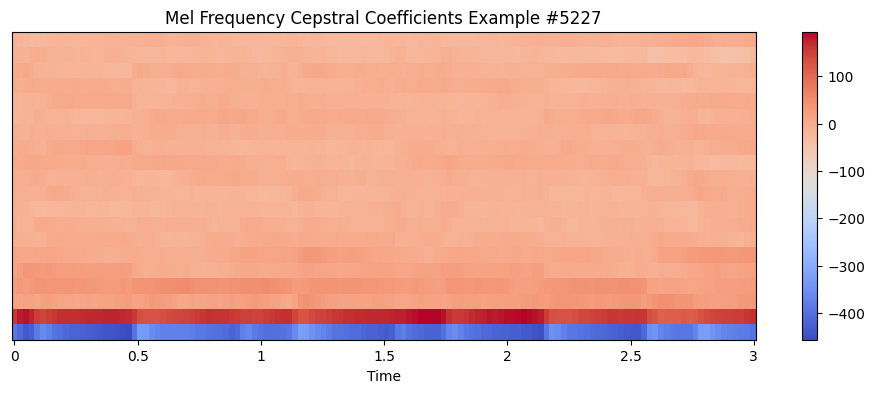

In [ ]:
plt.figure(figsize=(12,4))      #DISPLAY THE FEATURES FOR A RANDOM AUDIO FILE
random_audio = np.random.randint(0, len(x_train))
plt.title(f"Mel Frequency Cepstral Coefficients Example #{random_audio}")
random_audio = np.random.randint(0, len(x_train))
librosa.display.specshow(np.array(x_train)[random_audio], x_axis ="time")
plt.colorbar()

In [ ]:
x_train = torch.tensor(np.array(x_train))
x_train = x_train.unsqueeze(1)  # add channel dimension, only one channel for audio file
print(x_train.shape)
training_data = list(zip(x_train,y_train))

# training_data[i][0] = i'th audio file features
# training_data[i][1] = i'th label

torch.Size([6705, 1, 20, 130])


In [ ]:
# create testing datasets
print(len(os.listdir(test_path1)))
x_val = []
y_val = []

for f in os.listdir(test_path1):                                  #for each file in test set
    filename = os.path.join(test_path1, f)                        #create path to file
    if filename.endswith(".wav"):
        x_val.append(extract_feature(training_audio))             #extract features of audio and add to x array
        f = open(filename.replace('.wav','.txt'), "r")            #for each audio file, getting dominant instrument label from .txt file
        curr_label = (f.readline().strip())
        y_val.append(LABEL_TO_INDEX[curr_label])                  #add label to y array

for f in os.listdir(test_path2):                                  #for each file in test set
    filename = os.path.join(test_path2, f)                        #create path to file
    if filename.endswith(".wav"):
        x_val.append(extract_feature(training_audio))             #extract features of audio and add to x array
        f = open(filename.replace('.wav','.txt'), "r")            #for each audio file, getting dominant instrument label from .txt file
        curr_label = (f.readline().strip())
        y_val.append(LABEL_TO_INDEX[curr_label])                  #add label to y array

for f in os.listdir(test_path3):                                  #for each file in test set
    filename = os.path.join(test_path3, f)                        #create path to file
    if filename.endswith(".wav"):
        x_val.append(extract_feature(training_audio))             #extract features of audio and add to x array
        f = open(filename.replace('.wav','.txt'), "r")            #for each audio file, getting dominant instrument label from .txt file
        curr_label = (f.readline().strip())
        y_val.append(LABEL_TO_INDEX[curr_label])                  #add label to y array

1614


In [ ]:
x_val = torch.tensor(np.array(x_val))
x_val = x_val.unsqueeze(1)  # add channel dimension, only one channel for audio file
print("testing dataset shape", x_val.shape)
val_data = list(zip(x_val,y_val))

# val_data[i][0] = i'th audio file features
# val_data[i][1] = i'th label

testing dataset shape torch.Size([2874, 1, 20, 130])


In [ ]:
BATCH_SIZE = 10
from torch.utils.data.dataloader import DataLoader

train_dl = DataLoader(training_data, BATCH_SIZE, shuffle=True, num_workers=2, pin_memory=True)
val_dl = DataLoader(val_data, BATCH_SIZE*2, shuffle=True, num_workers=2, pin_memory=True)

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class AudioClassificationBase(nn.Module):
    def training_step(self, batch):
        audio, labels = batch
        # forward pass
        out = self(audio)  # Generate predictions for all the audio files in the batch
        loss = nn.CrossEntropyLoss()(out,labels) # Calculate cross-entropy (CE) loss
        return loss

    def test_step(self, batch):
        audio, labels = batch
        out = self(audio)  # Generate predictions for all the images in the batch
        loss = nn.CrossEntropyLoss()(out,labels) # Calculate cross-entropy (CE) loss
        acc = accuracy(out, labels) # Calculate accuracy
        return {'val_loss': loss.detach().cpu(), 'val_acc': acc}

    def test_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs] # Creates a list that contains the validation loss of each batch
        epoch_loss = torch.stack(batch_losses).mean()   # Combines batch losses into a single tensor and then calculates the mean
        batch_accs = [x['val_acc'] for x in outputs]    # Creates a list that contains the validation accuracy of each batch
        epoch_acc = torch.stack(batch_accs).mean()      # Combines batch accuracies into a single tensor and then calculates the mean
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))

def accuracy(outputs, labels):
    # generate predictions
    _, preds = torch.max(outputs,1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds)).detach().cpu()

In [ ]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device

    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [ ]:
device = get_default_device()
device

device(type='cpu')

In [ ]:
class CNNModel(AudioClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            # input: 1 x 20 x 130
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            # output: 16 x 20 x 130
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=[1,2], padding=1),
            # output: 32 x 20 x 64
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # output: 32 x 10 x 32

            nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1),
            # output: 32 x 10 x 32
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, stride=[1,2], padding=1),
            # output: 32 x 10 x 16
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            # output: 32 x 5 x 8

            nn.Flatten(),
            nn.Linear(1280, 512),
            nn.ReLU(),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 11))

    def forward(self, xb):
        return self.network(xb)

In [ ]:
model = CNNModel()
model

CNNModel(
  (network): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=1280, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=128, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=128, out_features=11, bias=True)
  )
)

In [ ]:
train_dl= DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device)

CNNModel(
  (network): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 2), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Flatten(start_dim=1, end_dim=-1)
    (11): Linear(in_features=1280, out_features=512, bias=True)
    (12): ReLU()
    (13): Linear(in_features=512, out_features=128, bias=True)
    (14): ReLU()
    (15): Dropout(p=0.5, inplace=False)
    (16): Linear(in_features=128, out_features=11, bias=True)
  )
)

In [ ]:
for audio, labels in train_dl:
    print('audio.shape:', audio.shape)
    out = model(audio)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

audio.shape: torch.Size([10, 1, 20, 130])
out.shape: torch.Size([10, 11])
out[0]: tensor([ 0.0849, -0.0936, -0.1010, -0.1251,  0.2505, -0.1379,  0.1893, -0.3657,
        -0.1055, -0.0429, -0.1753], grad_fn=<SelectBackward0>)


In [ ]:
#training the model

@torch.no_grad()
def evaluate(model, test_loader):
    model.eval()
    outputs = [model.test_step(batch) for batch in test_loader]
    return model.test_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, test_loader, weight_decay, opt_func=torch.optim.SGD): # SGD refers to mini-batch stochastic gradient descent
    history = []
    optimizer = opt_func(model.parameters(), lr, weight_decay=weight_decay)
    for epoch in range(epochs):
        # Training Phase
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            train_losses.append(loss.detach().cpu())
        # test phase
        result = evaluate(model, test_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result) # displays train_loss, val_loss and val_acc at the end of each epoch
    return history

In [ ]:
evaluate(model, val_dl)

{'val_loss': 2.4327540397644043, 'val_acc': 0.16785714030265808}

In [ ]:
num_epochs = 20
opt_func = torch.optim.Adam
lr = 0.00001
weight_decay = 0.000001

history = fit(num_epochs, lr, model, train_dl, val_dl, weight_decay, opt_func)

Epoch [0], train_loss: 2.3449, val_loss: 2.3570, val_acc: 0.0970
Epoch [1], train_loss: 2.2043, val_loss: 2.4935, val_acc: 0.0970
Epoch [2], train_loss: 2.1056, val_loss: 2.5307, val_acc: 0.0042
Epoch [3], train_loss: 2.0501, val_loss: 2.5454, val_acc: 0.0042
Epoch [4], train_loss: 2.0116, val_loss: 2.5192, val_acc: 0.0042
Epoch [5], train_loss: 1.9696, val_loss: 2.5862, val_acc: 0.0049
Epoch [6], train_loss: 1.9414, val_loss: 2.7031, val_acc: 0.0049
Epoch [7], train_loss: 1.9222, val_loss: 2.4916, val_acc: 0.0049
Epoch [8], train_loss: 1.8881, val_loss: 2.5437, val_acc: 0.0049
Epoch [9], train_loss: 1.8734, val_loss: 2.4987, val_acc: 0.0049
Epoch [10], train_loss: 1.8457, val_loss: 2.8452, val_acc: 0.0049
Epoch [11], train_loss: 1.8309, val_loss: 2.6081, val_acc: 0.0050
Epoch [12], train_loss: 1.8141, val_loss: 2.9106, val_acc: 0.0049
Epoch [13], train_loss: 1.7960, val_loss: 2.7427, val_acc: 0.0049
Epoch [14], train_loss: 1.7793, val_loss: 2.8296, val_acc: 0.0049
Epoch [15], train_lo